<a href="https://colab.research.google.com/github/nawazsaj/Regression-Model/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - **Regression**
##### **Contribution**    -  **Individual**
##### **Contributor**     - **S Nawaz**

# **Project Summary -**

####Yes Bank was a very reputed bank till 2018. After 2018, the bank came under the umbrella of risk inflated banks because of the fraud case by Rana kapoor. This project would help not only yes bank but to all those banks who want to predict their future and are in conundrum for their future. So Machine Learning is helping us to resolve the issue of all those companies and firms who want to gather some courage in order to survive in the market for a longer time.
#### This project aims to address the challenge of predicting the closing price of Yes Bank's stock, which is a crucial task for stakeholders, investors, and market participants. Yes Bank, as a prominent private sector bank in India, has encountered significant hurdles in recent years, including a substantial number of bad loans and involvement in fraud cases. These challenges have led to regulatory intervention by the Reserve Bank of India, making the prediction of Yes Bank's stock prices complex and uncertain.

#### To tackle this challenge, the project utilizes a comprehensive dataset comprising monthly stock price data since the bank's inception. The dataset includes various important metrics such as the closing, starting, highest, and lowest prices for each month. The objective is to develop predictive models that can effectively capture the intricate dynamics and trends in Yes Bank's stock prices, taking into account the turbulent events and uncertainties associated with the bank's performance.


####The project involves applying various modeling techniques, including time series models regression methods. The goal is to evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Additionally, the models will be assessed on their ability to incorporate the impact of significant events, such as fraud cases involving the bank's founders or regulatory interventions by the Reserve Bank of India.

####By successfully predicting the closing price of Yes Bank's stock, this project can provide valuable insights and assist stakeholders in making informed decisions related to their investments in the bank. It aims to navigate the complexities and uncertainties surrounding Yes Bank's stock prices, ultimately contributing to the understanding of its financial performance and aiding in effective decision-making.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Pandas for data manipulation and analysis
# Import NumPy for numerical computations
# Import Matplotlib for basic data visualization
# Import Seaborn for advanced statistical visualizations
# Import the datetime module for working with dates and times and soo on
# Import warnings module to ignore potential warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')





### Dataset Loading

In [ ]:
# Load Dataset
## Mounting google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# The 'pd.read_csv()' function reads the CSV file and returns a Pandas DataFrame.
yesbank_df = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')   ## Creating path for the dataset

### Dataset First View

In [ ]:
# Dataset First Look ## df. head gives the top 5 rows of the data set
yesbank_df.head()

In [ ]:
yesbank_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
yesbank_df.shape



* There are 185 rows and 5 columns in our data set.  



### Dataset Information

In [ ]:
# Dataset Info gives the basic information about the data
yesbank_df.info()

*  As we can see the Date column data type is 'object' and other column are 'float64'

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
## checking the duplicate values are present in our data set
len(yesbank_df[yesbank_df.duplicated()])

*  There are 0(zero) duplicated values in our data set

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
yesbank_df.isnull().sum()

*  Zero null value in our data set

In [ ]:
# Visualizing the missing values
null_counts= yesbank_df.isnull().sum()
null_counts.plot.bar()
plt.title('Null Value Counts')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

### What did you know about your dataset?

### The given dataset of yesbank has 185 rows and 5 Columns/Features, in which we have the target label/dependent variable- "close"{i.e. we have to predict the closing stock price} with the help of our independent variable i.e.- "Date", "open", "High", "Low".There are no null and duplicate values in the dataset."Date" feature has an object datatype which will be converted into a datetime datatype in further process.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
yesbank_df.columns

In [ ]:
# Dataset Describe
    ## It gives the Statistical Information about the numeric column.
yesbank_df.describe()


### Variables Description

###  We have 185 rows and 5 columns/features description are as follows-

*  Date: It denotes the month and year of the for a particular price.
*  Open: Open means the price at which a stock started trading that month.
* High: refers to the maximum price that month.
* Low: refers to the minimum price that month.
* Close: refers to the final trading price for that month, which we have to predict using regression

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
yesbank_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
             # Write your code to make your dataset analysis ready.
## As we have seen in dataset that 'DATE' feature is in not the correct format, so we have to change it in 'Datetime' format
# First check the format of 'Date' Feature
yesbank_df['Date']


*  From the above output it is seen that DATE is in the format of MM-YY but we have to convert it into proper date format like YYYY-MM-DD

In [ ]:
# Converting Date to Datetime format(YYYY-MM-DD)
yesbank_df['Date']= pd.to_datetime(yesbank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
yesbank_df

*   But the problem is that our ML models doesn't work on "Date" data.So we need to convert it into numerical column.But, numerical date have no use in our respective dataframe to predict the goal .So,make the "Date" column as dataframe index .


In [ ]:
## Converting 'Date' Feature to dataframe Index.
yesbank_df.set_index('Date',inplace=True)

 ## checking the data frame with index 'Date'
yesbank_df.head()

### What all manipulations have you done and insights you found?

### The given dataset has 185 rows and 5 columns/features having no null and duplicates values.'Date' Feature is not in the proper format so it is converted to 'datetime' format and made it to the Index of the data frame as per our need to proceed further.

In [ ]:
##   copying the data frame as df
df = yesbank_df.copy()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1  **Histogram and KDE Plot of Dependent Variable 'Close'**

In [ ]:
# Chart - 1 visualization code
# Plotting the histogram to see Dependent variable 'Close' distribution which we need to predict later
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="blue")
plt.title("Close stock price distirbution")

##### 1. Why did you pick the specific chart?

* I have picked the above chart because it combines both histogram and kde plot that offers a comprehensive visualization of the data distribution.
* It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.
* The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot.

##### 2. What is/are the insight(s) found from the chart?

*  From the above chart it is clearly visualize that it is **right/positively skewed** and has to be converted to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into **normal distribution**.

#### Chart - 2 -  Log Transformation of Dependent Variable 'Close'

In [ ]:
# Chart - 2 visualization code
#  Plotting the Log Transformation to see Dependent variable 'Close' distribution which we need to predict later.
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['Close']),color="blue")
plt.title("Close Price Distribution after log transformation")

##### 1. Why did you pick the specific chart?

*  I have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.




##### 2. What is/are the insight(s) found from the chart?

*  Log transformation is sufficient to bring the noraml distribution.It shows the mean is pumped and the frequent points are not near to mean. The plot clarifies about the bubble price of Yes Bank stock remained for very less time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  It helps to observe the peak and vallyes in closing stock price.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

#### Chart - 3 -  Histogram and KDE Plot of independent Variable

In [ ]:
# Chart - 3 visualization code
##   separating the independent and dependent variables
# Independent Variables
indep_var=df[['High','Low','Open']]
#dependent variable
dep_var=df['Close']
    ##    Visualizing the independent variables
for var in indep_var:
    plt.figure(figsize=(17,7))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var],color='blue')
    fig.set_title("Distribution", fontsize=16)
    fig.set_ylabel('Density')
    fig.set_xlabel(var)




##### 1. Why did you pick the specific chart?

*  I have picked the above chart because it combines both histogram and kde plot that offers a comprehensive visualization of the data distribution.
*  It allows for a better understanding of the distribution's characteristics, such as its shape, peaks, and deviations from a normal distribution.
*  The combined plot provides a richer visualization that incorporates both the frequency-based information from the histogram and the smooth density estimate from the KDE plot.

##### 2. What is/are the insight(s) found from the chart?

*  From the above chart it is clearly visualize that it is right/positively skewed and has to be converted to normal distribution and by converting it to normal distribution outliners can be removed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Currently can't say that it has a positive or negative impact but it is helpful to understand and decide upon the requirement of transformation of the features for Model implementation.Here we will use log transformation to convert it into normal distribution and to remove outliner.



#### Chart - 4 - Box plot

In [ ]:
# Chart - 4 visualization code
##  checking the outlier in the independent variables with the help of box whisker plot
for var in indep_var:
    plt.figure(figsize=(17,7))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y = df[var],color='r')
    fig.set_title("Distribution", fontsize=16)
    fig.set_title('Outliers in Various Features')
    fig.set_ylabel(var)




##### 1. Why did you pick the specific chart?

*  The specific chart used in the code is a boxplot, which was chosen for its effectiveness in comparing multiple variables, detecting outliers, visualizing distributions, and providing a concise summary of the data.
*  The notch feature adds a confidence interval around the median, enhancing comparison. The boxplot's space efficiency allows for displaying multiple variables in a compact manner.
*  the boxplot is a suitable choice for analyzing and comparing the Open, High, Low, and Close prices of the stock.
*  identify the outliers in every feature

##### 2. What is/are the insight(s) found from the chart?

*  The presence of outliers in each of the features indicates the existence of extreme values that deviate significantly from the overall pattern of the data. These outliers can potentially impact the model fitting process and the accuracy of the predictions. Therefore, it is crucial to address these outliers before proceeding with model fitting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

*  Handling outliers helps to ensure that the model captures the underlying patterns and relationships accurately, leading to more reliable predictions and interpretations. It also improves the robustness of the model against extreme observations that may introduce bias or noise. Properly addressing outliers contributes to the overall validity and integrity of the analysis, enhancing the reliability of the model fitting process and subsequent predictions.

#### Chart - 5

###Log tranformation to convert Independent Feautres to normal distribution

In [ ]:
# Chart - 5 visualization code

# log tranformation to convert Independent Feautres to normal distribution

for col in indep_var:
    plt.figure(figsize=(25, 6))
    plt.subplot(1, 2, 1)
    plt.title("Distribution Curve")

# np.log() is a method in numpy library to convert our dataset values into log transformation to get a normal distribution curve

    feature_to_log = np.log(df[col])  # assign log tranformation value into a variable
    sns.distplot(feature_to_log, color="blue")

# The Axes. axvline() function in axes module of matplotlib library is used to add a vertical line across the axis.
# It will show where the "mean" and "median" lie for each plot

    plt.ylabel("Density", size=14)
    plt.axvline(feature_to_log.mean(),color='magenta',linewidth=1.5)
    plt.axvline(feature_to_log.median(),color='red',linestyle="dashed",linewidth=1.5)

# creating boxplot to see if there is any outliers in any feature or not
# using subplot() function of matplotlib to create boxplot in this figure itself

    plt.subplot(1, 2, 2)
    plt.title("Outliers in Various Features")
    sns.boxplot(y=feature_to_log, color="r")

plt.show()

##### 1. Why did you pick the specific chart?

*  I have used the log transformation because the distribution is not much skewed, and log transformation is helpful to bring the normal pattern in distribution of dependent feature.Beacuse of the Log transformation outliners are removed.

##### 2. What is/are the insight(s) found from the chart?

*  As we can see the outlier are removed from our data set
*  Log transformation is sufficient to bring the noraml distribution.The plot clarifies about the bubble price of Yes Bank stock remained for very less time.we can see from the distribution curve that mean is now closer median.

*  From the above boxplot after log transformation, we can see outliner are removed and we have approximate result of quartiles for independent features which are as follows-
1.  For feature Open- Lower Quartile(Q1)- 3.6 ,Median(Q2)- 4.3, Upper Quartile(Q3)- 5.0
2.  For feature High- Lower Quartile(Q1)- 3.7 ,Median(Q2)- 4.4, Upper Quartile(Q3)- 5.2
3.  For feature Low- Lower Quartile(Q1)- 3.3 ,Median(Q2)- 4, Upper Quartile(Q3)- 4.9

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  It helps to observe the peak and vallyes in stock prices.The inflated price at mean is temporary as it is a bubble point and after this the price got decline tremendously because of the fraud case which happened in 2018.

*  After the log transformation, the outliner are removed and the distribution is converted to normal pattern which will suffice the model requirements and help to achieve better accuracy of our models,so we can say that the transformation has a positive impact.



#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Visualizing yesbank stock closing price over the time.
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x="Date", y="Close",data=df,color='r').set(title='Yes Bank closing price',xlabel='Year')

##### 1. Why did you pick the specific chart?

*  Line plot is used to show the progression of a variable over time or any continuous variable that has an inherent order.
*  They are particularly useful for visualizing trends, seasonality, and changes in values over time.

##### 2. What is/are the insight(s) found from the chart?

*  From the above plot we can easily see that price has increasing trend from 2009-2108 but after 2018 there is sudden drop in the prices because of the fraud case involving Rana Kapoor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  As we know the stock closing price serves as a benchmark for determining how a stock performs and also help investors comprehend how its value has changed over time.
*  From the above plot it is seen that stock closing price diminishes continously after 2018 ,so it is alarming for the yes bank to cope with this situation as closing price is that one price which drives investors to invest in a stock or not.So, as per scnerio the insights have a negative impact on business, but by observing the trend they must try to restrict the stock manipulation to become stable in terms of revenue.

#### Chart - 7

In [ ]:
# Chart - 6 visualization code
# Visualizing the trend of yesbank stock opening price over the time.
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x="Date", y="Open",data=df,color='r').set(title='Trend for Yes Bank opening price',xlabel='Year')

##### 1. Why did you pick the specific chart?

*  Line plot is used to show the progression of a variable over time or any continuous variable that has an inherent order.
* They are particularly useful for visualizing trends, seasonality, and changes in values over time.


##### 2. What is/are the insight(s) found from the chart?

*  Here also the opening price also affected because of fraud , before that the opening day price increases continuously till 2018. We can take closing price of the stock as the dependent variable as it is the final price of the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The impact of fraud on organaisation can be devastating,leading to **significant financial loss**, **irreparrable damage to reputation**,**potential legel repercussions**,and a **decline in employee morale and trust**.

#### Chart - 8



**Visualizing the relation b/w independent and dependent variable**



In [ ]:
# Chart - 8 visualization code

# Visualizing the relation b/w independent and dependent variable

plt.figure(figsize = (22,8))

plt.subplot(1, 3, 1)
plt.scatter(df['Close'], df['Open'], alpha=0.5,color = 'red')
plt.title('Open and Close stock prices of yesbank ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df,color = 'r')

plt.subplot(1, 3, 2)
plt.scatter(df['Close'], df['High'], alpha=0.5,color = 'red')
plt.title('High and Close ')
plt.xlabel('High')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df,color = 'r')

plt.subplot(1, 3, 3)
plt.scatter(df['Close'], df['Low'], alpha=0.5,color = 'red')
plt.title('Low and Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df,color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

* Scatter plot is used because it is easy to visualize the relationship between two variables.
* They help you understand if there is any correlation or pattern between the variables.
* Scatter plots are useful for assessing the strength and direction of the relationship between two variables. By examining the overall pattern of the data points, we can determine if there is a positive correlation (both variables increase together), negative correlation (one variable increases while the other decreases), or no correlation between the variables.



##### 2. What is/are the insight(s) found from the chart?

*  From the above plot it is visible that dependent variable is highly related to all independent variables which is a good sign while implementing the models

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The gained insights have a positive correlation between independent and dependent variables which is a plus for our models
*   But we have to be cautious about the multicollinearity and try to merge the features or drop them to rectify the multicollinearity which will ultimately increase the model accuracy.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Chart - 9 visualization code
## First step to check multicollinearity
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

*  Heatmaps are used to visually represent data in a matrix form where each cell's color is determined by its value.
*  Heatmaps are commonly used in data visualization to represent patterns or relationships in data, and to identify areas of high and low values or activity.*  Heatmap consists of small square boxes having a numeric value known as correlation coefficient.
*  A correlation coefficient is a statistical measure that indicates the strength and direction of a linear relationship between two variables.
*  A correlation coefficient of 0 indicates no linear relationship between the two variables, while a correlation coefficient of 1 indicates a perfect positive linear relationship

##### 2. What is/are the insight(s) found from the chart?

*  From the above plot,it is very significant that there is high collinearity.Each and every feature is correlated with every other feature.(i.e. Multicollinearity)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The gained insights are useful to understand and get an idea about the collinearity of the features so that we could deal with it in future model implentation.

#### Chart - 10  -  Pair Plot

In [ ]:
# Chart - 10 visualization code
      ## Visualizing the pair plot of the dependent and independent variable
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

*  A pair plot graph is used for analyzing the Yes Bank stock price because it helps explore relationships, detect patterns and trends, and identify outliers.
*  It allows for correlation analysis and understanding of data distributions.
* The visualization of time series data is facilitated, aiding in the identification of long-term trends.
* Pair plots are visually appealing and effective for communicating findings to stakeholders. They can generate hypotheses and compare variables with other relevant factors.
*  Pair plots support exploratory data analysis, serving as a starting point for further analysis.

##### 2. What is/are the insight(s) found from the chart?

*  The variables Open, High, and Low show a strong correlation with the Close variable, indicating a close relationship between the stock's opening, highest, lowest, and closing prices.
* The Open, High, and Low variables also exhibit a high correlation with each other, suggesting they move in sync and share similar trends.
*  These correlations provide valuable insights for analyzing the Yes Bank stock and can serve as predictors of the closing price.

*  Understanding these connections aids in making informed decisions and identifying patterns for forecasting future stock price movements.
* However, it's important to consider that correlation does not imply causation, and comprehensive analysis requires additional factors and considerations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The insights gained from the strong correlations between the Open, High, Low, and Close variables can have a positive business impact.
*   They aid in making informed decisions and predicting the closing price, improving investment strategies for Yes Bank stock.
*   However, correlation alone does not guarantee success, and comprehensive analysis is necessary, considering other factors and potential limitations.
*   The insights do not directly lead to negative growth; rather, misinterpretation or over-reliance on correlations without considering other factors can result in negative outcomes.
*   Thorough analysis, risk management, and understanding market conditions are crucial for mitigating risks and ensuring positive growth.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

*  There are no missing values in the dataset.



### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

## Replacing outliner with null values and then replacing null values with median.

# Replace outliers with null values
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df < lower_bound) | (df > upper_bound)] = np.nan

# Replace null values with median
median = df.median()
df = df.fillna(median)

##### What all outlier treatment techniques have you used and why did you use those techniques?

*  Firstly I went with log transformation of features in the visualization part where transformation to the data can sometimes help to normalize the distribution and reduce the impact of outliers. This transformation can make the data more suitable for analysis while minimizing the effect of extreme values but it is not the most robust method to deal with outliers.

*  Secondly, I came up with the Interquartile Range (IQR) method which is a robust statistical method in which I replaced the outliers of all feature with its respective median so that the distribution do not drastically change and should not be affected by the outliers.



### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns ### there is no categorical variable in our data set

#### What all categorical encoding techniques have you used & why did you use those techniques?

*  In our data set all the columns are numerical, including the 'Date' column being represented as an object type. Since all the columns are already numerical, there is no need for categorical encoding in this particular dataset.

*  Categorical encoding is typically required when you have categorical variables that need to be converted into numerical representations for analysis or machine learning tasks. In our case, all the columns ('Open', 'High', 'Low', 'Close') are numerical, representing different aspects of the stock closing price.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?



Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulating the feature/variable-

corr = df.corr()

*  Generally it might happen when we replaced outliers with median, our correlation b/w independent and dependent variable got distorted that will affect our model accuracy, so analyzing again the correlation b/w independent and variable, if distorted then will apply log transformation to data frame
[ ]


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
      ## Feature selection for Independent and dependent variable
independent_variable= [i for i in df.columns if i not in ['Close']]
dependent_variable= 'Close'

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

* Open', 'High', 'Low' are Important features as they contain maximum information which will be very helpful for prediction.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
## log transfomation method
df['Open']= np.log(df['Open'])
df['High']= np.log(df['High'])
df['Low']= np.log(df['Low'])
df['Close']= np.log(df['Close'])

In [ ]:
## Checking the correlation b/w independent and dependent variable that it is restored or not, after data transformation.
cor_log=df.corr()
sns.heatmap(cor_log,annot=True)

###Data Transformation is required and I have used log transformation(np.log) for the data which is given. The reasons behind the transformation are as follows-

*  Data which is given is right skewed so to make the distribution normal and symmetric transformation is required which will help to implement the model correctly and pricesly which help us to reach towards desired accuracy.
*  After treating outliers the correlation b/w independent and dependent variable got distorted so to restore that, transformation is required and as we can see from the above heatmap the correlation are restored which will make our model more accurate for prediction, but it has multicollinearity and to deal with it we have to drop that feature which is least correlated with the target variable, but by doing so we lose the valuable information as our dataset is small, so we continue with the multicollinearity and check how our model behaves with this phenomena.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

*  Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations, attempting to reduce the number of features may not provide significant benefits and could potentially lead to loss of valuable information. Therefore, it is advisable to retain all the available features for analysis or modeling purposes without applying dimensionality reduction methods..

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# importing the train_test_split
from sklearn.model_selection import train_test_split



In [ ]:
# making x and y variable
X= df[independent_variable].values
y=df[dependent_variable].values

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X ,y , test_size= 0.2,random_state=0)
print(X_train.shape,X_test.shape)

print(Y_train.shape , Y_test.shape)

##### What data splitting ratio have you used and why?

*  For the Data spliting, the 20% data has been splitted as test data. As the data is already very small 20 % would be enough to test upon the training model.

### 9. Data Scaling

In [ ]:
# Scaling your data
scaler= MinMaxScaler()
X_train1= scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

* I  have used Standard and MinMax Scaler to scale the data.The reason to use scaling is that it provides benefits in terms of algorithm performance, convergence speed, and interpretability.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 ▶ Linear Regression


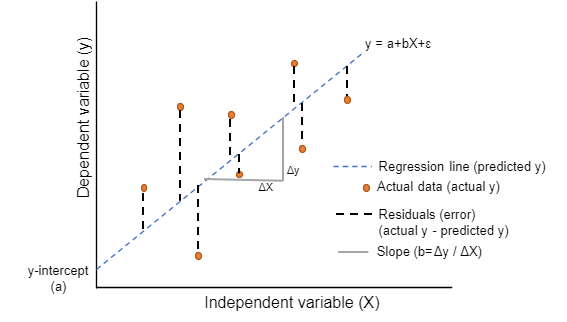

Linear Regression is a powerful machine learning algorithm that falls under the category of supervised learning. It is specifically designed for regression tasks, where the goal is to predict a continuous target variable based on independent variables. In regression analysis, the algorithm establishes a relationship between the predictor variables and the target variable to make accurate predictions.

The primary objective of Linear Regression is to identify and quantify the relationship between variables. By examining the patterns and trends in the data, the algorithm enables us to understand how changes in one variable affect the target variable. This understanding is crucial for making informed decisions and forecasting future outcomes.

Linear Regression is widely employed in various domains, including finance, economics, social sciences, and engineering. It finds applications in areas such as sales forecasting, housing price prediction, demand estimation, and trend analysis. By leveraging the insights gained from analyzing the relationship between variables, Linear Regression empowers us to make reliable forecasts and make informed business decisions.

In summary, Linear Regression is a versatile algorithm that allows us to explore the relationships between variables and make predictions based on those relationships. Its ability to model the dependencies between variables makes it a valuable tool for understanding data and making accurate forecasts in numerous fields.

In [ ]:
# ML Model - 1 Implementation
# Create an instance of the LinearRegression model
linear_reg = LinearRegression()

# Fit the Algorithm
# Fit the Linear Regression model to the training data
linear_reg.fit(X_train1, Y_train)

In [ ]:

# Predict on the model
y_pred_lin = linear_reg.predict(X_test1)


In [ ]:
linear_reg.score(X_train1, Y_train)

In [ ]:
#Checking the training accuracy of model
round(linear_reg.score(X_train1,Y_train),6)


In [ ]:
#Checking the testing accuracy of model
round(linear_reg.score(X_test1,Y_test),4)

In [ ]:
# Checking the model parameters
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from numpy import math

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = round(linear_reg.score(X_train1,Y_train),4)
test_accuracy = round(linear_reg.score(X_test1,Y_test),4)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_lin), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_lin)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_lin), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_lin), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Liner Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_lin),color='orange')
plt.plot((Y_test))
plt.suptitle('Actual Vs Predicted Close Price:Linear Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)



###The evaluation metrics for the Linear Regression model are as follows:

1.  Mean Squared Error (MSE): The MSE value is 0.0489, indicating the average squared difference between the actual and predicted Close prices. Lower values indicate better model performance, as they represent a smaller overall prediction error.

2.  Root Mean Squared Error (RMSE): The RMSE value is 0.2211, which is the square root of the MSE. It provides a measure of the average difference between the actual and predicted Close prices in the original scale. Again, a lower value signifies better predictive accuracy.

3.  Mean Absolute Error (MAE): The MAE value is 0.0911, representing the average absolute difference between the actual and predicted Close prices. Similar to MSE and RMSE, a smaller MAE indicates better model performance.

4.  R-2 Score: The R-2 score is 0.9408, reflecting the proportion of variance in the dependent variable (Close prices) explained by the independent variables. A score closer to 1 indicates a better fit of the model to the data.




#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 ▶ Lasso Regression

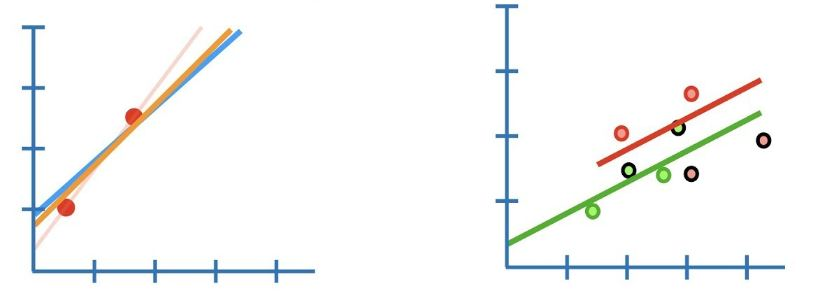

**Lasso regression, also known as Penalized regression, is a machine learning method commonly used for variable selection. It offers improved prediction accuracy compared to other regression models. By applying Lasso regularization, the model can enhance interpretability while effectively reducing the impact of less relevant variables. This regularization technique plays a crucial role in feature selection and contributes to a more accurate and interpretable model.**



In [ ]:
# importing the lasso regression
from sklearn.linear_model import Lasso

In [ ]:
# ML Model - 2 Implementation
lasso = Lasso(alpha = 0.00001)

# Fit the Algorithm
lasso.fit(X_train1, Y_train)

In [ ]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test1)
# Print the coefficients of the Lasso model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso model
print("Intercept:", lasso.intercept_)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = round(lasso.score(X_train1,Y_train),4)
test_accuracy = round(lasso.score(X_test1,Y_test),4)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_lin), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_lin)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_lin), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_lin), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Lasso Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_lasso),color='red')
plt.plot((Y_test),color='blue')
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation with hyperparameter tuning refers to the process of combining cross-validation with the search for the optimal hyperparameters of a machine learning model. The advantage of using cross-validation with hyperparameter tuning is that it provides a more reliable estimate of the model's performance by evaluating different hyperparameter combinations on multiple folds of the data. It helps to avoid overfitting and ensures that the selected hyperparameters generalize well to unseen data.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_cv = Lasso()
# Fit the Algorithm
# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_cv, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train1, Y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


In [ ]:
lasso_best=Lasso(alpha = 0.001)
lasso_best.fit(X_train1,Y_train)

In [ ]:
# Predict the model
y_pred_best=lasso_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = lasso_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_best)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_lin), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_lin)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_lin), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_lin), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Lasso Regression plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_best),color='red')
plt.plot((Y_test),color='blue')
plt.suptitle('Actual Vs Predicted Close Price:Lasso Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In the normal Lasso regulariztion the accuracy for train and test is 97% and 94% respectively with RMSE- 0.2211
But after cross validation with new value of alpha, the train and test accuracy become 96% and 93% respectively with RMSE- 0.2297
There is decrease in training as well as testing accuracy after cross-validation,this means model approaches towards slightly generalized fitting.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 -Ridge Regression Model

In [ ]:
# ML Model - 3 Implementation
# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

In [ ]:
# Fit the Algorithm
ridge=Ridge()
ridge.fit(X_train1,Y_train)

# Predict on the model
y_pred_ridge= ridge.predict(X_test1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression performs **L2 regularization**, i.e. adding a factor to sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

###Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. α = 0:
*  The objective becomes same as simple linear regression.
*  We’ll get the same coefficients as simple linear regression.
2. α = ∞:
* The coefficients will be zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < α < ∞:
* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression.

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = ridge.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_ridge)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_ridge), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_ridge)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_ridge), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_ridge), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Ridge Regression plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_ridge),color='black')
plt.plot((Y_test),color= 'lime')
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

**The accuracy of model for training and testing is 95% and 94% respectively.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_cv=Ridge()

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_cv, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train1, Y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


In [ ]:
# Predict on the model
ridge_best= Ridge(alpha=0.01)
ridge_best.fit(X_train1,Y_train)

In [ ]:
y_pred_rcv= ridge_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = ridge_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_rcv)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_rcv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_rcv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_rcv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_rcv), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Ridge Regression plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_rcv),color='black')
plt.plot((Y_test),color='lime')
plt.suptitle('Actual Vs Predicted Close Price:Ridge Regression(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*  In Ridge regularization the training and testing accuracy is 95% and 94% respectively with Rmse 0.2188
*  After cross validation the ridge accuracy for training increased to 97% but testing accuracy remains 94% with Rmse 0.2212
####After applying cross validation, the testing accuracy remains same as in L2 regularizarion but training accuracy increased to 97% which shows a slightly higher risk of overfitting compared to the regularized Ridge model ,so preferably one must go with regularized Ridge model as it offers good performance, while also promoting model simplicity and interpretability.

###ML Model - 4 - ▶Elastic Net Regression

In [ ]:
#Implementing Elastic Net Regression
from sklearn.linear_model import ElasticNet

In [ ]:
# ML Model - 4 Implementation
elastic_reg = ElasticNet(alpha=0.001,l1_ratio=0.005)
# Fit the model
elastic_reg.fit(X_train1,Y_train)
#Predict the model
y_pred_elastic= elastic_reg.predict(X_test1)

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


**Elastic Net** is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = elastic_reg.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_elastic)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_elastic), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_elastic)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_elastic), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_elastic), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Elastic Net plot- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic),color='aqua')
plt.plot((Y_test),color='black')
plt.suptitle('Actual Vs Predicted Close Price:Elastic Net', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
# plt.grid(True)

###2. Cross- Validation & Hyperparameter Tuning of Elastic Net

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
elastic = ElasticNet()
# Fit the Algorithm
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)
elastic_model.fit(X_train1,Y_train)
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

In [ ]:
elastic_best= ElasticNet(alpha=0.001,l1_ratio=1)
elastic_best.fit(X_train1,Y_train)

In [ ]:
# Predict the model
y_pred_elastic_cv= elastic_best.predict(X_test1)

In [ ]:
 # Visualizing using evaluation Metric Score chart
train_accuracy = elastic_best.score(X_train1,Y_train)
test_accuracy = r2_score(Y_test,y_pred_elastic_cv)
print( 'Train accuracy is ',train_accuracy)
print(' Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_elastic_cv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_elastic_cv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_elastic_cv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_elastic_cv), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Elastic Net plot after cross validation- Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_elastic_cv),color='aqua')
plt.plot((Y_test),color='black')
plt.suptitle('Actual Vs Predicted Close Price:Elastic Net(Cross Validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

####Which hyperparameter optimization technique have you used and why?

*  I have used GridSearch cross validation technique. It gives functionality for parameter evaluating at the given regularizrion technique.



####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* In Elastic Net the training and testing accuracy is 96% and 94% respectively with Rmse 0.2225
* After Cross-Validation the Elastic Net accuracy for training is 96% which remains the same but the testing acuuracy decreases to 93% with Rmse 0.2297


###ML Model - 5 - ▶RFR = Random Forest Regressor Model

In [ ]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
# Fit the Algorithm
RFR.fit(X_train1, Y_train)
# Predict on the model
y_pred_RFR= RFR.predict(X_test1)

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to create a more powerful and robust predictive model.

The basic idea behind the Random Forest algorithm is to build a "forest" of decision trees and make predictions by aggregating the results of each individual tree. Each decision tree in the forest is constructed using a random subset of the training data and a random subset of the features (input variables). This randomness helps to introduce diversity among the trees and prevents overfitting.

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = RFR.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_RFR)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_RFR), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_RFR)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_RFR), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_RFR), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Random Forest Regressor plot - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_RFR),color='green')
plt.plot((Y_test),color='black')
plt.suptitle('Actual Vs Predicted Close Price:Random Forest', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

####2. Cross- Validation & Hyperparameter Tuning of Random Forest

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)
RFR_cv = RandomForestRegressor()

# Fit the object to train dataset
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
RFR_cv_grid = GridSearchCV(RFR_cv, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5)

# Fit the Algorithm
RFR_cv_grid.fit(X_train1, Y_train)

In [ ]:
RFR_cv_grid.best_params_

In [ ]:
RFR_best=RandomForestRegressor(max_depth=3,n_estimators=50)
RFR_best.fit(X_train1,Y_train)

In [ ]:
# Predict the model
y_pred_RFR_CV= RFR_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = RFR_best.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_RFR_CV)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_RFR_CV), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_RFR_CV)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_RFR_CV), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_RFR_CV), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# Random Forest Regressor plot after cross-validation - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_RFR_CV),color='green')
plt.plot((Y_test),color='black')
plt.suptitle('Actual Vs Predicted Close Price:Random Forest(cross validation)', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* In Random Forest the training and testing accuracy comes out to be 99% and 91% respectively with RMSE value : 0.2651
* After cross validation of Random Forest the training accuracy decreases to 97% and testing accuracy and Rmse 0.2574 that means this model is less prone to overfitting and it may generalize better to unseen data.





###ML Model - 6 -: XGBoost

In [ ]:
# ML Model- 6 - Implementation
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Fit the model
xgb.fit(X_train1,Y_train)
# Predict the model
y_pred_xgb= xgb.predict(X_test1)


####1. Explain the ML Model used and its performance using the Evaluation metric Score Chart

XGBoost (eXtreme Gradient Boosting) is an advanced machine learning algorithm that belongs to the gradient boosting family. It is widely used for regression and classification tasks and has gained popularity for its high performance and scalability.The key idea behind XGBoost is to iteratively build an ensemble of weak prediction models, typically decision trees, and combine their predictions to create a strong predictive model. The algorithm optimizes a specific objective function by minimizing the loss during each boosting iteration.

XGBoost is designed to be highly efficient and scalable, making it suitable for large datasets and complex problems.

[ ]


In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = xgb.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_xgb)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_xgb), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_xgb)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_xgb), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_xgb), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

In [ ]:
# XGBOOST Regressor plot - Actual price vs predicted price.
plt.figure(figsize=(12,6))
plt.plot((y_pred_xgb),color='gold')
plt.plot((Y_test),color='black')
plt.suptitle('Actual Vs Predicted Close Price:XG BOOST', fontsize =14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

####2. Cross- Validation & Hyperparameter Tuning of XG BOOST

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV)

from xgboost import XGBRegressor
xgb_cv = XGBRegressor()

# Define the hyperparameter grid
grid_values = {
    'n_estimators': [50, 80, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create GridSearchCV object
xgb_cv_grid = GridSearchCV(xgb_cv, param_grid=grid_values, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
xgb_cv_grid.fit(X_train1, Y_train)

# Get the best parameters and best score
best_params = xgb_cv_grid.best_params_
best_score = xgb_cv_grid.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

In [ ]:
XGB_best= XGBRegressor(max_depth=3,n_estimators=50,learning_rate=0.1)
XGB_best.fit(X_train1,Y_train)

In [ ]:
y_pred_xgb_cv= XGB_best.predict(X_test1)

In [ ]:
# Visualizing using evaluation Metric Score chart
train_accuracy = xgb.score(X_train1, Y_train)
test_accuracy = r2_score(Y_test, y_pred_xgb_cv)
print('Train accuracy is ',train_accuracy)
print('Test accuracy is ', test_accuracy)
print("MSE value :", round(mean_squared_error(Y_test, y_pred_xgb_cv), 4))
print("RMSE value :", round(math.sqrt(mean_squared_error(Y_test, y_pred_xgb_cv)), 4))
print("MAE value :", round(mean_absolute_error(Y_test, y_pred_xgb_cv), 4))
print("MAPE value :", round(mean_absolute_percentage_error(Y_test, y_pred_xgb_cv), 4))
print("r2 score   :",round(r2_score(Y_test,y_pred_lin),4))

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* In XG BOOST model the training and testing accuracy comes out to be 99% and 91% respectively which is sign of slightly overfitting.
* After applyting Cross Validation to XG BOOST, training and testing accuracy remains same as it was earlier in normal XG BOOST, it means  the default hyperparameters provided by XGBoost are sufficient as well as optimized, and there is no need for further hyperparameter tuning.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# Function to run all model
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models

    i=0

    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)

        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)


        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)

        i+=1

    #Sorting values by accuracy
    df.sort_values(by=['RMSE'],ascending=True,inplace=True)

    return df

In [ ]:
models=[linear_reg,lasso,ridge,elastic_reg,RFR,xgb]

In [ ]:
#Testing performance
report=score_model(X_train1,Y_train,X_test1,Y_test)
report

**As we can see, from the above dataframe, that all models have Rsquare(R2_SCORE) greater than 90%, it means the proportion of variation in the dependent variable is very well explained by the independent variable (i.e. more than 90%) but on the contrary we must take care off the errors occuring in the models as well as how much a model is prone to overfitting. So,by keeping in mind all these perpective I choose RMSE as Error benchmark and the model having least RMSE is Ridge regularization attaning a traning accuracy of 95%.**

###R2_SCORE AND RMSE are the evaluation metrics which have positive impact on business.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

*  I have considered Ridge Reguralization as my final prediction model which has testing accuracy of 94% and training accuracy of 95%, showing least RMSE value among all models and not prone to overfitting. It offers good performance, while also promoting model simplicity and interpretability.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Retrieve the coefficients (feature weights)
coefficients = ridge.coef_

# Create an array of feature names
feature_names = np.array(['Open','High','Low'])

# Sort the coefficients and corresponding feature names
sorted_features = [feature for _, feature in sorted(zip(coefficients, feature_names))]
sorted_coefficients = np.sort(coefficients)

# Plotting the feature importance
plt.figure(figsize=(12, 8))
bar_width= 0.5
plt.barh(sorted_features, sorted_coefficients,color= 'pink')
plt.title("Feature Importance in Ridge Regularization", fontsize=16)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Independent Features", fontsize=12)
plt.tight_layout()
plt.show()

**According to the model choosen Low feature is contributing the most.**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
ridge = Ridge()
ridge.fit(X_train1, Y_train)

In [ ]:
model_file = 'ridge.pkl'

# Save the model to the specified file path
with open(model_file, 'wb') as file:
    pickle.dump(ridge, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Specify the file path of the saved model
model_file = 'ridge.pkl'

# Load the model from the pickle file
with open(model_file, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Predict using the loaded model and x_test1
y_pred1 = loaded_model.predict(X_test1)
y_pred1

In [ ]:
Y_test

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

*  #### From 2016 to 2018 stock closing price increase but after year 2018 it started decreasing because of Rana Kapoor case
* #### We got to know that data for dependent and indepent variables are rightly skewed for that we applied log transformation.
*  #### The log transformation successfully addressed positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.

#### Closing Price of a stock refers to the final price at which the stock is traded on a particular stock exchange on a given trading day. It is the last price at which the stock is bought or sold during the trading session.

1.  Importance: The closing price is an important metric used by investors, analysts, and traders to evaluate a company's financial health, market value, and stock performance. It is also used to calculate other important metrics such as the daily price change, market capitalization, and trading volume.

2.  For an Average Investor: An average investor sees investing in stocks for long-term purposes and in premium stocks that have proved to be quality and high-performing stocks over the years. For such investors, the daily closing price may not hold as high importance as for an average trader.

3.  For a Traders: For traders and analysts, the information on the closing price of stocks is essential to make sure that they make sound trading decisions and maximize returns on their portfolios.

###Models Implemented

*  I have implemented six models/Algorithms- Linear Regression,Lasso Reguralization,Ridge Reguralization,Elastic Net, Random Forest Regressor, XG BOSST Regressor.
*  The best performing model to predict the closing stock price of yes bank is Ridge Reguralization having training and testing accuracy as 95% and 94% respectively in untuned condition having lowest RMSE(.219), with cross-validation and hyperparameter tuning(Tuned Model) its training and testing accuracy is 97% and 94% respectively which tends to generalized fitting and prone to slight-risk of overfitting.
*  All Independent Features(High,Low,Open) are Strongly correlated with each other as well with the depenedent Feature(Close) also.

*  According to the best performing model Feature Low is of Outmost importance.

*  Evaluation Metrics used to choose the best performing model is r2_score and RMSE.

*  The results indicate adopting supervised Learning Algorithms to identify stock manipulation using a labeled dataset based on a Fraud case is promising.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***